<a href="https://colab.research.google.com/github/LauraDimaria/Sales-Predictions/blob/main/Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sales Predictions, Part 3
##Laura Dimaria
###5/5/2022

In [1]:
import pandas as pd
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
df = df.drop(columns = ['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'])

df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#How many rows and columns?
df.shape

(8523, 9)

In [4]:
#What are the datatypes of each variable?

In [5]:
df.dtypes

Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
dtype: object

In [6]:
#Are there duplicates? If so, drop any duplicates.
df.duplicated().sum()

0

In [7]:
# Identify missing values.
df.isna().sum()

Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
dtype: int64

In [8]:
item_weight = df['Item_Weight'].value_counts()
item_weight

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [9]:
outlet_size = df['Outlet_Size'].value_counts()
outlet_size

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [10]:
#Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).
df['Outlet_Size'].fillna('Medium', inplace=True)

df.isna().sum()
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


I chose to keep the Outlet Size column. It is important to factor in the size of the supermarket. A small store will have less area for visibility and items than a store with a high size. For the missing data, I chose to replace the missing values with the most common type of outlet, Medium. There were 2,793 Medium sized stores, 2,388 Small stores, and only 932 High stores. I came to the conclusion that there was a high probility that any missing stores were of the Medium size.

In [11]:
df = df.drop(columns=['Item_Weight'])
df.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


I chose to drop the Item Weight category because after looking at a sample of rows, it seemed like weight would have little influence over any type of sales predictions. Weight is probably more important for shipping costs.

In [12]:
# Confirm that there are no missing values after addressing them.
df.isna().sum()

Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

In [13]:
#Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 
df.nunique()

Item_Fat_Content           5
Item_Visibility         7880
Item_Type                 16
Item_MRP                5938
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
Item_Outlet_Sales       3493
dtype: int64

In [14]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [15]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF': 'Low Fat', 
                                                       'reg': 'Regular', 
                                                       'low fat': 'Low Fat'}) #Fix lower case & abbrevieations

In [16]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [17]:
df['Item_Type'].value_counts() 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [18]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [19]:
##For any numerical columns, obtain the summary statistics of each (min, max, mean)
df.describe().round(2)

,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.00,8523.00,8523.00
mean,0.07,140.99,2181.29
std,0.05,62.28,1706.50
min,0.00,31.29,33.29
25%,0.03,93.83,834.25
50%,0.05,143.01,1794.33
75%,0.09,185.64,3101.30
max,0.33,266.89,13086.96


-Histogram to view the distributions of various features in your dataset.

-Boxplot to view statistical summaries of various features in your dataset.

-Heatmap of the correlation between features.

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

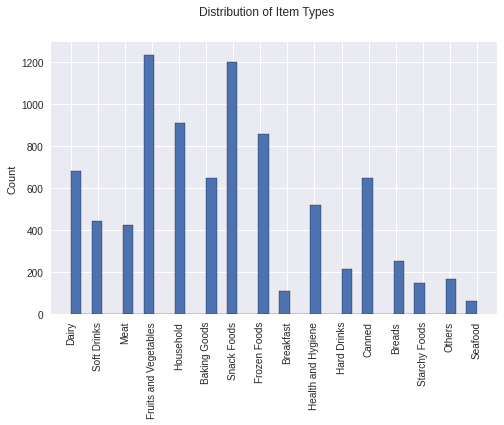

In [55]:
plt.style.use('seaborn')
plt.figure(figsize=(8,5))
df['Item_Type'].hist(bins='auto',
                     edgecolor='black')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.suptitle('Distribution of Item Types');

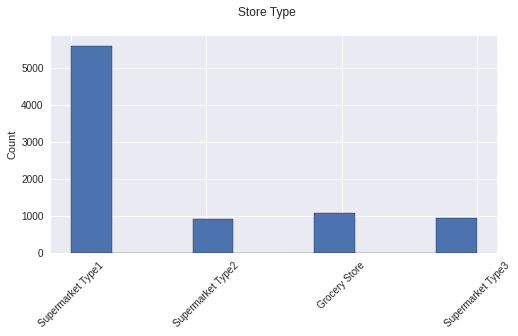

In [63]:
plt.style.use('seaborn')
plt.figure(figsize=(8,4))
df['Outlet_Type'].hist(edgecolor='black')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.suptitle('Store Type');

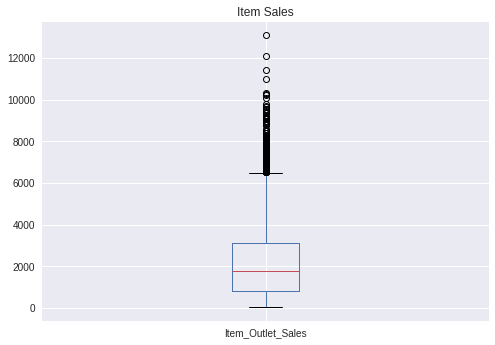

In [60]:
df.boxplot(column = 'Item_Outlet_Sales')
plt.title('Item Sales')
plt.show()

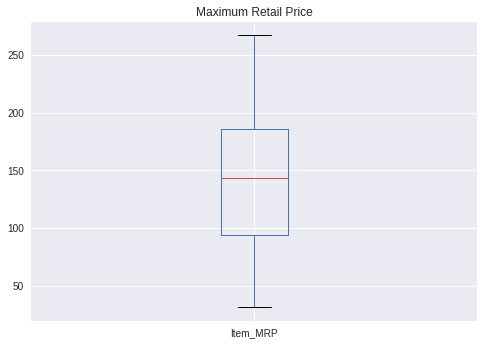

In [61]:
df.boxplot(column = 'Item_MRP')
plt.title('Maximum Retail Price')
plt.show()

In [21]:
corr = df.corr()

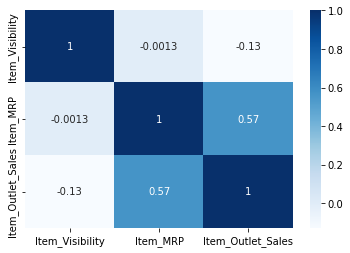

In [26]:
sns.heatmap(corr, cmap = 'Blues', annot=True)